<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />
# __CMSE  201 - Fall 2019__
    

# Homework 6: Practicing all of your data fitting skills

## Goals

### By the end of the homework assignment you will have practiced:

1. Fitting the properties of unfamiliar data using:
    - `polyfit()`
    - `curve_fit()`
    - The Metropolis-Hastings MCMC algorithm
2. Visualizing your results

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, November 22** It should be uploaded into the "Homework Assignments" submission folder for Homework #6.  Submission instructions can be found at the end of the notebook.

## Grading

* Question 1 (**2 points**)
* Question 2 (**4 points**)
* Question 3 (**2 points**)
* Question 4 (**8 points**)
* Question 5 (**4 points**)
* Question 6 (**4 points**)
* Question 7 (**8 points**)
* Question 8 (**2 points**)
* Question 9 (**1 point**)
* Question 10 (**1 point**)
* Question 11 (**12 points**)
    
**Total**: 48 points

---
# Becoming a data fitting wizard

At this point in the semester, you've had the opportunity to test your ability to fit models to data and extract best fit parameters. For this assignment, you're going to practice these skills again! 

This time, you're going to be working with a top secret dataset and the origins of the values are classified. While this makes it a bit challenging to know exactly what the right model is, you're going to do your best and report back to the authorities that provided you with the data.

So, **let's get to it!**

The data file that you're going to be working is aptly named `mystery.csv` and you should have downloaded it from D2L along with this notebook. Again, since you don't have any idea exactly what this data represents, you're going to explore various models that might serve as good representations of the general trends within the data.

First things first -- time to load in the data! 

**Question 1 (2 points)**: Using either Pandas or NumPy, read the two columns in the data file into your python notebook and store the the first column as `x` and the second column as `y`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt("mystery.csv", delimiter = ',') #import csv file
x = data[:,0] #first column
y = data[:,1] #second column

**Question 2 (4 points)**: Now that you've loaded in the data, make a plot that shows how `y` changes as a function of `x`. You should make sure to format your plot so that it's easy to see the relationship between `x` abd `y`. You should also include useful things like axis labels! (Also, feel free to use seaborne if you want to change the overall look of your plot).

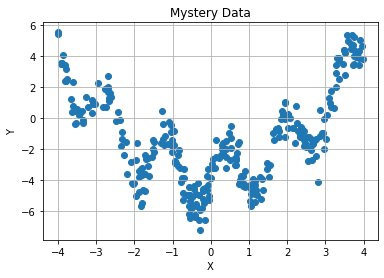

In [3]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mystery Data')
plt.grid()

**Question 3 (2 points)**: Before you start trying to fit any sort of models, what features do you see in the data? Describe any patterns or large scale behavior you notice in the data.

I see a parabolic sine curve! The minimum value is very close to 1, approx. -0.25

**Question 4 (8 points)**: Clearly a line doesn't seem like a good choice to model the properties of this dataset. However, a second order polynomial might be a good fit!

Now do the following:

1. Use NumPy's `polyfit` function to fit a polynomial of degree 2 to the data.
2. Use `poly1d` to create a function that can be used to plot the best fit curve on top of the data.
3. Generate 200 evenly spaced values between -4 and 4 and store those in a new variable called `x_model`
4. Plot the data and then overplot the `y_model` values that correspond to the `x_model` values you just created. You should be able to use the function you created using `poly1d` to do this!

In [4]:
coeff = np.polyfit(x,y,2)
fit = np.poly1d(coeff)
x_model = np.linspace(-4,4,300)
y_model = fit(x_model)

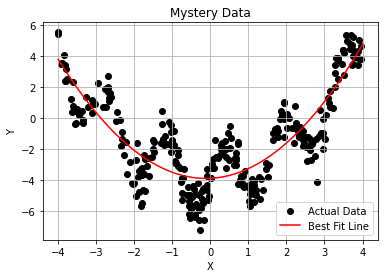

In [5]:
plt.scatter(x,y,c='black',label='Actual Data')
plt.plot(x_model,y_model,'red',label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mystery Data')
plt.legend()
plt.grid()

**Question 5 (4 points)**: How well does this model appear to fit the data? What are the best fit parameters for this model? **Make sure to print them out**. Are there features that still aren't captured by this model? If so, comment on which features these are.

In [6]:
a,b,c = coeff
print('The parameters are: \na = %.5f \nb = %.5f \nc = %.5f' %(a,b,c)) #trying to get creative with different ways to format

The parameters are: 
a = 0.50889 
b = 0.12000 
c = -3.88839


This model fits the big picture of the data pretty well! It's missing the sine-curve-esque aspect of it, i.e., the miniature hills and valleys within the larger parabola shape

**Question 6 (4 points)**: Would a higher order polynomial fit the data better? Try fitting higher order polynomials and decide which one you think provides the "best" overall fit to the data. **Defend your choice below!**

*Note*: you may have to experiment a higher order polynomial than you might have ever previously tried! This is where `poly1d()` really comes in handy!

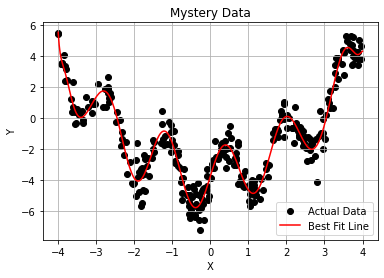

In [7]:
coeff = np.polyfit(x,y,20)
fit = np.poly1d(coeff)
x_model = np.linspace(-4,4,300)
y_model = fit(x_model)

plt.scatter(x,y,c='black',label='Actual Data')
plt.plot(x_model,y_model,'red',label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mystery Data')
plt.legend()
plt.grid()

I would say that a polynomial of degree 20 is a great fit for the data (as shown above). However, I make this claim with caution because higher degree polynomials risk becoming poorly conditioned. I'm confident that this works for this dataset though. 

**Question 7 (8 points)**: Although you might have been able to get a decent fit to the data using a higher order polynomial, it seem like such a polynomial is an overly complex way of fitting the data. Instead of just experimenting with `polyfit`, it might make more sense to use SciPy's `curve_fit` to fit a simple model to the data.

As you've hopefully noticed at this point, the second order polynomial seemed to do a good job of fitting the large scale behavior of the data, but there also appears to be a periodic signal in the data as well.

**Define a new function that combines a second order polynomial and a sinusoidal function and use `curve_fit` to find the best fit parameters for this new function.**

*Hint*: You may need to experiment with the `p0` parameters that you can feed into `curve_fit` to get a model that captures in the "wiggles" in the dataset.

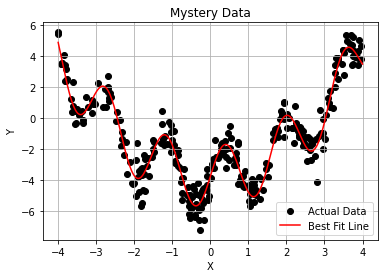

In [8]:
from scipy.optimize import curve_fit

def fit_fn(x,A,B,C,D):
    return A*(x**2) + B*np.sin(C*x)+D

opt, cov = curve_fit(fit_fn, x, y, p0=[.01,5,5,5])
a,b,c,d = opt

y_model = fit_fn(x_model,a,b,c,d)

plt.scatter(x,y,c='black',label='Actual Data')
plt.plot(x_model,y_model,'red',label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mystery Data')
plt.legend()
plt.grid()

In [9]:
a,b,c,d = opt
print('The parameters are: \na = %.5f \nb = %.5f \nc = %.5f \nd = %.5f' %(a,b,c,d))

The parameters are: 
a = 0.49531 
b = 1.97425 
c = 4.01701 
d = -3.75902


**Question 8 (2 points)**: Were you able to get a better looking fit for the model? How do your best fit parameters from `curve_fit` compare to the best fit parameters from your second order polynomial fit? Are any of them roughly the same? If so, discuss whether or not this what you would expect.

The fit looks great! 

Yes, the first parameter (A) of both of them are almost the same (approx 0.5). Aside from those, they are a little different. I'm assuming this is because of the added in sine function that messed with the placement of parameters. 

---
### Pushing further with MCMC

At this point, you feel like you've done a good job of fitting the data, but you'd really like to make sure you've got the best possible fit for some of your parameters. To do this, you're going to use a Markov Chain Monte Carlo (MCMC) approach. Although you could try using MCMC to calculate best fit values for _all_ of your parameters, you're going to limit your search to **just two** of the parameters in your model to keep things simple.

**Question 9 (1 point)**: Using your model from Question 7, you're going to pick **two** of the model parameters to explore with an MCMC approach and you will *leave all other parameters fixed* based on your results from Question 7. **State which two of your parameters you will be trying to fit with MCMC:**

I will try to fit the first two, A and B

**Question 10 (1 point)**: Now, in order to use $\chi^2$ as our "cost function" for computing the goodness of fit, we also need to have an estimate of the error bars on our data points. Since we don't exactly know where the data came from, or what the "right" error bars should be, let's assume that the error for each point is 10% of its value. **Define a new array, `sigma` that is equal to 10% of the original `y` array in the dataset.** 

In [10]:
sigma = y*.1

**Question 11 (12 points)**: At this point we need to implement the MCMC algorithm to explore parameter space for the **two free parameters** that you chose in Question 9.

**All of your other parameters should be set to constants and you should use the values that came out of your best fit from Question 7**. For example, if you had a parameter `A` and the best fit value was 8.25 then you should set `A = 8.25` and use that in your model when doing the MCMC search for finding the best fit values for your two free parameters.

As a reminder, the equation for $\chi^2$ error is like so:

$$ \chi_R^2 = \frac{1}{N_{pts}}\sum_i \frac{(y_{data,i} - y_{model,i})^2}{2 \sigma_i^2} $$

The function for calculating this error is provided for you in the cell below (and cleverly called `calculate_error`)

#### Implementing the MCMC algorithm 

Using the Day 20 in-class assignment as a guide, you should now try to implement the MCMC algorithm to find the best fit for your two free parameters (part of the Day 20 notebook is also included for reference at the end of this notebook).

You should take **$n = 100000$** steps and use a step size of **0.05**. Remember, you can use your function from Question 7 to compute your model values!

**Upon completing the search, you should make the following plots**:

1. A plot of where your random walker "walked" in parameter space while it tried to find the best fit values (you can try starting your walker whever you want, but if you get strange results, it might be because you started the walker too far away). Your plot should basically be of "parameter 2" vs "parameter 1" as the walker walked for whatever your two parameters are.
1. A 2D histogram and contour plot that highlights where the best fit parameters are.

Finally, **you should print the best fit values and comment on how they compare to the values you found using `curve_fit`.**


In [11]:
def calculate_error(ys_actual, ys_model, sigma):
    """
    Calculate the chi-squared error between two sets of data
    """
    return ((ys_actual-ys_model)**2/(2*sigma**2)).sum()/(ys_actual.size)

def fit_fn(x,A,B,C,D):
    return A*(x**2) + B*np.sin(C*x)+D

def make_noisy_data(width, intercept, sigma, num_points):
    xs = np.linspace(-5, 5, num_points)
    ys = width * xs**2 + intercept
    ys_noisy = ys + np.random.normal(0.0, sigma, num_points)
    
    return xs, ys, ys_noisy

In [12]:
n = 100000 #number of steps
h = 0.05   #step size

C = c      #C parameter from Q7
D = d      #D parameter from Q7

A0 = .5
B0 = 2

A_vals = [A0]
B_vals = [B0]

y_model0 = y_model #from Q7
chi0 = calculate_error(y, y_model0, 2) #y from Q7

for i in range(n):
    A1 = A0 + np.random.normal()*h
    B1 = B0 + np.random.normal()*h
    
    y_model1 = fit_fn(x_model, A1, B1, C, D) #x_model from Q7
    chi1 = calculate_error(y, y_model1, 2)
    
    P = np.exp(-1*chi1)/np.exp(-1*chi0)
    r = np.random.random()
    
    if r < P:
        chi0 = chi1
        A_vals.append(A1)
        A0 = A1
        B_vals.append(B1)
        B0 = B1
    else:
        continue


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

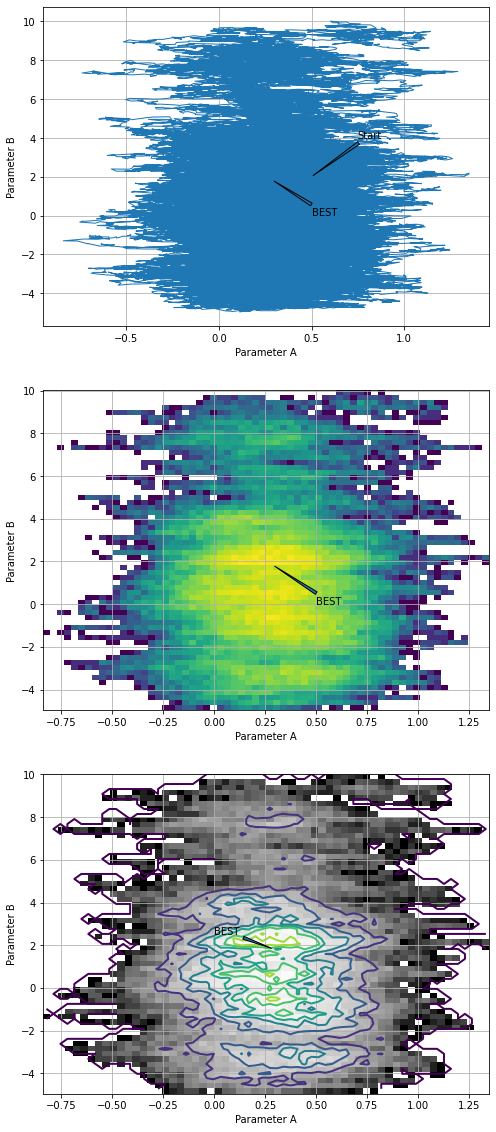

In [13]:
from matplotlib.colors import LogNorm

fig, [path, colored, bw] = plt.subplots(3,1, figsize = (8, 20))
counts, xbin, ybin, img = colored.hist2d(A_vals, B_vals, bins=64, norm=LogNorm())
max_location = np.argwhere(counts == counts.max())
best_A = xbin[max_location[0,0]]
best_B = ybin[max_location[0,1]]

path.plot(A_vals,B_vals,linewidth=1)
path.annotate('Start',xy=(.5,2),xytext=(.75,4),arrowprops={'arrowstyle':'wedge'})
path.annotate('BEST',xy=(best_A,best_B),xytext=(.5,0),arrowprops={'arrowstyle':'wedge'})
path.set_xlabel("Parameter A")
path.set_ylabel("Parameter B")
path.grid()


colored.annotate('BEST', xy=(best_A, best_B), xytext=(.5,0), arrowprops={'arrowstyle':'wedge'})
colored.set_xlabel("Parameter A")
colored.set_ylabel("Parameter B")
colored.grid()

bw.hist2d(A_vals,B_vals, bins=60, norm=LogNorm(), cmap='gray')
bw.contour(0.5*(xbin[1:]+xbin[:-1]), 0.5*(ybin[1:]+ybin[1:]), counts.transpose(), linewidths=2)
bw.annotate('BEST',xy=(best_A,best_B),xytext=(0,2.5),arrowprops={'arrowstyle':'wedge'})
bw.set_xlabel("Parameter A")
bw.set_ylabel("Parameter B")
bw.grid()

plt.tight_layout

In [14]:
print('The best fit parameters are: \nA = %.5f \nB = %.5f' %(best_A, best_B))

The best fit parameters are: 
A = 0.28951 
B = 1.82660


<font size=20>&#9998;</font> What are you best fit parameters? How do these compare to the values that `curve_fit` found?

The A parameter has only an approx. 0.2 difference, but the B parameter has around a 1.7 error. 

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  

In [170]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/zw3MaBYJWhY9XHrA7" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the submission link for Homework #6, and upload it there.

---
---
---


# Markov Chain Monte Carlo fitting

## How it works

The general idea behind MCMC fitting of our data is that we will start from a guess at our model parameters and "walk" in random directions in parameter space in a way that **on average gets us closer to the best fit to the data.**  We keep track of the points that we’ve sampled over time (we call this the "trace" of the data), and use those to create a distribution.  The distribution shows us how likely each set of model parameters is to fit the data.

We’re going to think about how this works using the model from our pre-class assignment as an example.
Specifically, you’re going to revisit fitting data of the form

$$
   f(x) = W x^2 + I
$$

by intelligently searching for optimal $W$ and $I$ (_width_ and _intercept_ of the parabola) values. Specifically, Metropolis-Hastings fitting consists of these steps:

1. Start with an initial guess of the model parameters, $(W_0, I_0)$.
2. Calculate $\chi_0^2$ for this initial guess.

Then, the following occurs in a loop over specified number of steps:

3. Take a (potential) "step" from $(W_0, I_0)$ in a random direction to produce $(W_1, I_1)$
4. Calculate the the ["reduced chi-squared"](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic) values (as done in the pre-class), $\chi_0^2$ and $\chi_1^2$, for the parabolas defined by $(W_0, I_0)$ and $(W_1, I_1)$.
5. Calculate an acceptance probability, $P = e^{-\chi_1^2}/e^{-\chi_0^2}$, as the ratio of two *likelihood functions* (the exponentials).
6. Uniformly generate a random number $r \in [0, 1)$. If $r < P$, "accept" $(W_1, I_1)$ as the next initial guess and assign $\chi_0^2$=$\chi_1^2$. Otherwise, discard $(W_1, I_1)$ and generate a new potential step from $(W_0, I_0)$.
7. Repeat this process until you’ve generated as many points as you care to (100000 isn’t bad).

### Notes:

* The Markov-chain part of Markov-chain Monte Carlo means "the next step only depends on the current step."
* If $\chi_1^2 < \chi_0^2$ (i.e. the error from $(W_1, I_1)$ is less than the error from $(W_0, I_0)$), then $P > 1$ and the new point is _always_ accepted.
* By keeping track of the valid steps, we can chart the progress of a "walker" as it (hopefully!) moves towards a set of optimum values. The walker will tend to stay in the region of good fit but its wandering will inform on the range of likely values.
* The randomness here _usually_ prevents walkers from moving in sub-optimal (higher-error) directions but occasionally allows it to happen in hopes of finding even lower error zones.